In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv("/storage/git/projects/DataImcubator/Project/CanadaCollisions/data/NCDB_2012.csv", low_memory=False)
df.columns = ['year', 'month', 'weekday', 'hour', 'severity', 'vehiclenum', 'colconf', 'roadconf', 'weather', 'surface', 'roadalign', 'trafcontrol', 'vid', 'vtype', 'vyear', 'pid', 'sex', 'age', 'position', 'treatment', 'safety', 'user']

df['fatality'] = df['severity'].astype(str)
df['fatality'].replace(str(1),'Fatal', inplace=True)
df['fatality'].replace(str(2),'Non-fatal', inplace=True)


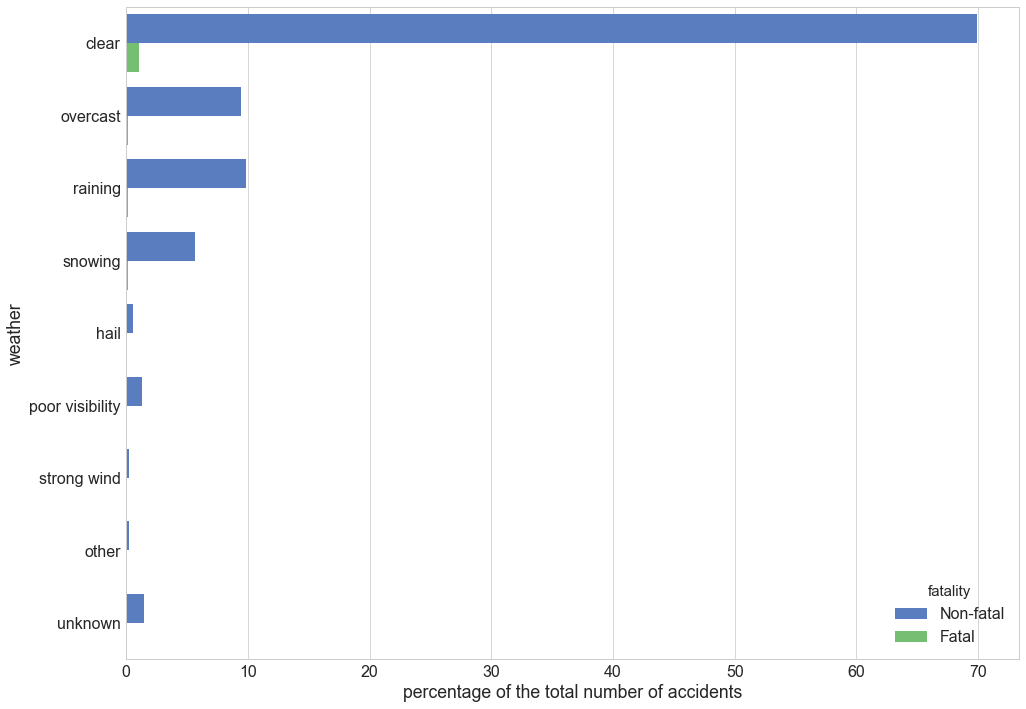

In [98]:
#%pylab inline
plt.figure(figsize=(16, 12))
sns.set(context='paper', font_scale=2, style='whitegrid')

order = sorted(df.weather.unique())
ax = sns.barplot(y="weather", x="severity", order=order, hue="fatality", data=df, estimator=lambda x: len(x) / len(df) * 100, palette="muted")
ax.set(xlabel="percentage of the total number of accidents")

ylabels = ['clear', 'overcast', 'raining', 'snowing', 'hail', 'poor visibility', 'strong wind', 'other', 'unknown']
ax.set_yticklabels(ylabels) 
plt.savefig('weather.png', dpi=500)

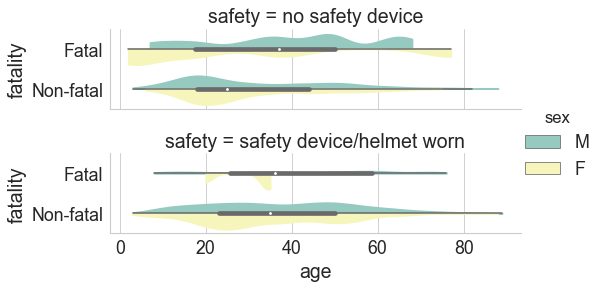

In [100]:
#let's look at the bycylist stats and correlations with safety measures
bikers = df[df['user']=='4']
bikers.is_copy = False
bikers.drop(bikers[(bikers.age == 'UU')].index, inplace=True)
bikers.drop(bikers[(bikers.age == 'NN')].index, inplace=True)
bikers.drop(bikers[(bikers.age == 'XX')].index, inplace=True)
bikers.drop(bikers[(bikers.sex == 'N')].index, inplace=True)
bikers.drop(bikers[(bikers.sex == 'U')].index, inplace=True)
bikers.drop(bikers[(bikers.sex == 'X')].index, inplace=True)
bikers.drop(bikers[(bikers.safety == 'UU')].index, inplace=True)
bikers.drop(bikers[(bikers.safety == '13')].index, inplace=True)
bikers.drop(bikers[(bikers.safety == '12')].index, inplace=True)
bikers.drop(bikers[(bikers.safety == '13')].index, inplace=True)
bikers.drop(bikers[(bikers.safety == 'NN')].index, inplace=True)
bikers.drop(bikers[(bikers.safety == 'QQ')].index, inplace=True)

cols_to_convert = ['age']

for col in cols_to_convert:
    bikers[col] = pd.to_numeric(bikers[col], errors='coerce')

bikers['safety'] = np.where(np.logical_or(bikers['safety']=='02', bikers['safety']=='09'), 'safety device/helmet worn', 'no safety device')

sns.set(context='paper', font_scale=2, style='whitegrid')
sns.factorplot(x="age", y="fatality",hue="sex", row="safety",
                   data=bikers,
                     orient="h", size=2, aspect=3.5, palette="Set3",
                    kind="violin", split=True, cut=0, bw=.2)
plt.savefig('Bikers2.png', dpi=500)